## Importing the Libraries

In [2]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical

## Loading and Preprocessing the CIFAR-10 Data

In [5]:
(train_image, train_labels), (test_images, test_labels) = cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 49s 0us/step


## Normalizing the Pixel Data

In [8]:
train_images, test_images = train_image / 255.0, test_images / 255.0

In [10]:
# one-hot encode the labels

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

## Creating CNN Model

In [13]:
model = models.Sequential(
    [
        layers.Conv2D(32, (3, 3), activation = 'relu', input_shape = (32, 32, 3)),
        layers.MaxPooling2D(2, 2),
        layers.Conv2D(64, (3, 3), activation = 'relu'),
        layers.MaxPooling2D(2, 2),
        layers.Conv2D(64, (3, 3), activation = 'relu'),
        layers.Flatten(),
        layers.Dense(64, activation = 'relu'),
        layers.Dense(10)
    ]
)

C:\Users\watad\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [17]:
model.compile(optimizer = 'adam',
             loss = tf.keras.losses.CategoricalCrossentropy(from_logits = True),
             metrics = ['accuracy'])

## Training the Model

In [20]:
history = model.fit(train_images, train_labels, epochs = 10, validation_data = (test_images, test_labels))

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 29s 11ms/step - accuracy: 0.3656 - loss: 1.7149 - val_accuracy: 0.5511 - val_loss: 1.2528
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 17s 11ms/step - accuracy: 0.5934 - loss: 1.1519 - val_accuracy: 0.6342 - val_loss: 1.0385
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 18s 11ms/step - accuracy: 0.6524 - loss: 0.9948 - val_accuracy: 0.6688 - val_loss: 0.9465
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 17s 11ms/step - accuracy: 0.6889 - loss: 0.8835 - val_accuracy: 0.6930 - val_loss: 0.8737
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 17s 11ms/step - accuracy: 0.7225 - loss: 0.8021 - val_accuracy: 0.6977 - val_loss: 0.8753
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 17s 11ms/step - accuracy: 0.7367 - loss: 0.7509 - val_accuracy: 0.7032 - val_loss: 0.8625
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 17s 11ms/step - accuracy: 0.7537 - loss: 0.7066 - val_accuracy: 0.7025 - val_loss: 0.8702
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 17s 11ms/step - accuracy: 0.7708 -

## Visualizing the Training History

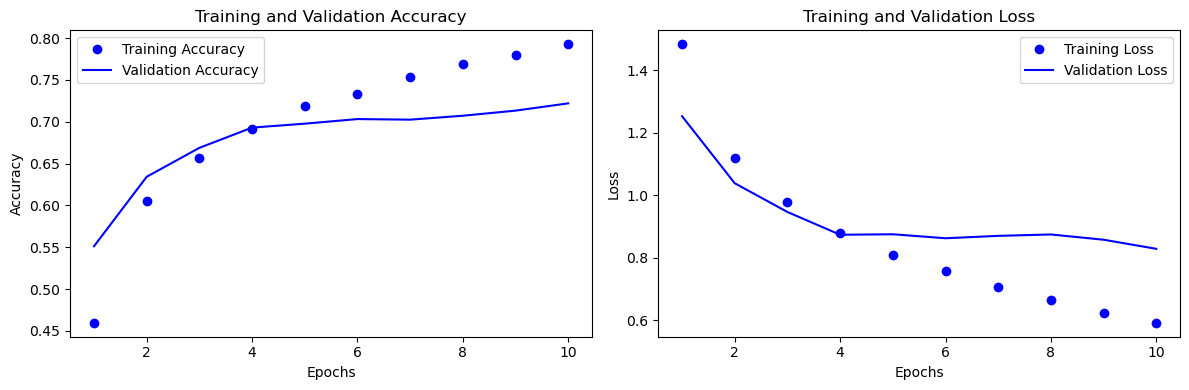

In [25]:
def plot_training_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    
    epochs = range(1, len(acc) + 1)
    plt.figure(figsize = (12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(epochs, acc, 'bo', label = 'Training Accuracy')
    plt.plot(epochs, val_acc, 'b', label = 'Validation Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(epochs, loss, 'bo', label = 'Training Loss')
    plt.plot(epochs, val_loss, 'b', label = 'Validation Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

plot_training_history(history)

## Visualizing Predictions

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


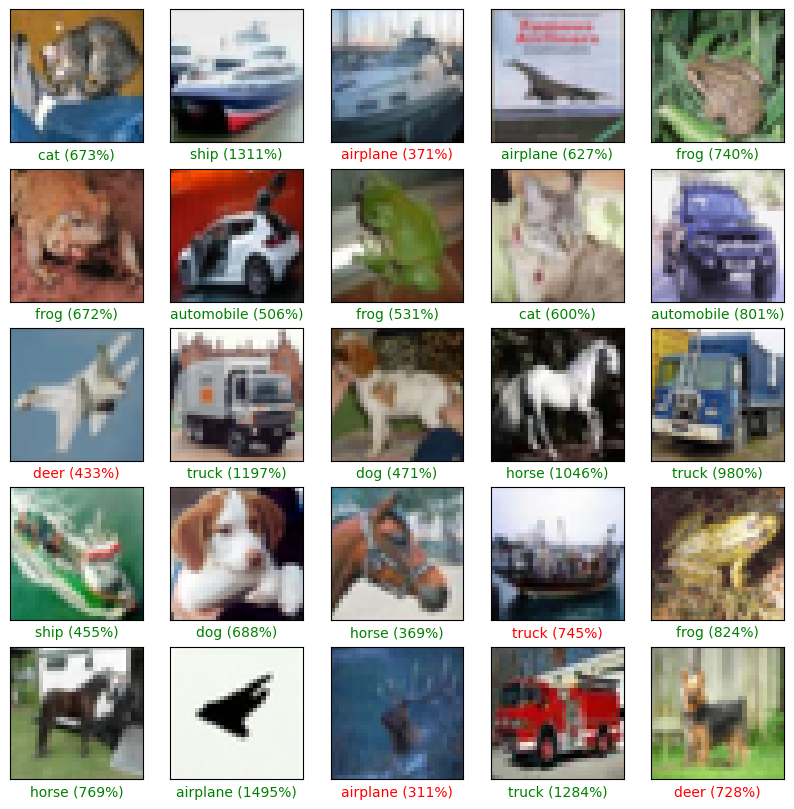

In [36]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

def plot_example_predictions():
    predictions = model.predict(test_images)
    num_rows, num_cols = 5, 5
    plt.figure(figsize = (10, 10))
    for i in range(num_rows * num_cols):
        plt.subplot(num_rows, num_cols, i + 1)
        plt.grid(False)
        plt.xticks([])
        plt.yticks([])
        plt.imshow(test_images[i], cmap = plt.cm.binary)
        predicted_label = np.argmax(predictions[i])
        true_label = np.argmax(test_labels[i])
        if predicted_label == true_label:
            color = 'green'
        else:
            color = 'red'
        plt.xlabel(f"{class_names[predicted_label]} ({100 * np.max(predictions[i]):2.0f}%)", color = color)

plot_example_predictions()